# Feuille de TP n°1

# UF Analyse Hilbertienne et Fourier : Convolution et échantillonnage

L’objectif de cette séance de TP est d’illustrer numériquement les notions de convolution et d’échantillonnage vues en cours et voir leurs applications possibles pour l’analyse de signaux permanents. L’outil de base est la transformée de Fourier discrète et l’algorithme de transformée de Fourier rapide qui lui est associée.

## 1 Transformée de Fourier discrète et FFT

**Principe :** on étudie un signal sur un intervalle de temps donné [0; T ]. Ce signal est périodisé de sorte qu’on étudie une fonction $f$ : $[0, T] \longrightarrow \mathbb{R}$ (ou à valeurs complexes) qui est égale au signal initial $\textit{seulement sur l’intervalle}$ $[0, T]$. On étudie le spectre du signal à l’aide de la série de Fourier associée :
$$
S(f)(t) = \sum_{n \in \mathbb{Z}} c_n exp(2i\pi \frac{n}{T} t), \quad c_n = \frac{1}{T} \int_0^T f(s) exp(-2i\pi \frac{n}{T} s) ds
$$

On va approcher le coefficient de Fourier $c_n(f)$ à l’aide de la formule des rectangles :
$$
c_n(f) \approx \gamma_n^N(f) = \frac{1}{N} \sum_{k=0}^{N-1} f(k\frac{T}{N}) exp(-2i\pi \frac{nk}{N})
$$

On appelle cette opération, une transformée de Fourier discrète. Elle possède des propriétés analogues à la transformée de Fourier (notamment son lien avec la convolution). Ici $N \in \mathbb{N}$ est choisi paire. Concrètement, on a échantillonné le signal $f$ à la fréquence $F_e = \frac{N}{T}$ sur un intervalle de temps $[0, T]$ aux points $t_k = k F_e$.  
La transformée de Fourier de ce signal discret est un signal périodique (cf cours Filtrage) : ce qui se retrouve ici puisque la suite $(\gamma_n^N)_{n \in \mathbb{Z}}$ est $N$-périodique. Dans ces conditions, les $(\gamma_n^N)_{n=0, \ldots, N-1}$ fournissent une approximation de $c_n(f)$ si $c_n(f) \approx \gamma_n^N(f)$ si $n \in [0, N/2 - 1]$ et $c_n(f) \approx \gamma_{n+N}^N(f)$ si $n \in [-N/2, 0]$. Pour un signal réel, $c_n(f) = c_{-n}(f)$ de sorte que l’on représente $|c_n(f)|$ en fonction de $\frac{n}{T}$ (les fréquences associées) pour $n \in [0, N/2 - 1]$.

Théoriquement, le calcul des $\gamma_n^N$ se fait par un produit matrice vecteur, ce qui induit un coût de calcul de l’ordre de $2N^2$. L’algorithme de transformée de Fourier rapide (FFT en anglais) permet de réduire le coût de calcul à $\mathcal{O}(N \log(N))$ pourvu que $N$ soit une puissance de 2 à l’aide d’une implémentation récursive.  
Pour reconstruire de manière approchée le signal, on utilise la série de Fourier tronquée qu’on évalue aux points $t_k$.
$$
f(t_k) \approx S_N(f)(t_k) = \sum_{n=-N/2}^{N/2} c_n(f) exp(2i\pi \frac{nk}{N})
$$

ce qui correspond à la transformée de Fourier inverse mais du point de vue discret. L’algorithme dédiée est appelée IFFT. Les commandes de base en Python sont $\texttt{fft}$, $\texttt{ifft}$, $\texttt{fftshift}$ (pour gérer le décalage d’indice) et font appel à la libraire $\texttt{fft}$ de $\texttt{numpy}$. Selon le logiciel utilisé, le coeﬃcient $1/N$ devant la somme peut être absent : il faut alors normaliser le coeﬃcient calculé pour retrouver une approximation des coeﬃcients de Fourier.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

**Exercice 1 - Son sinusoïdal :** Dans ce qui suit, on travaille avec une fréquence d’échantillonnage des données audio de $8800$ Hz.

**1)** Générer un tableau contenant l’échantillonnage d’une fonction sinusoidale à $440$ pulsations (périodes) par seconde pendant $3$ secondes.

In [3]:
# Fréquence de la sinusoïde en Hz
frequency = 440

# Durée du signal en secondes
duration = 3

# Fréquence d'échantillonnage en Hz
sampling_rate = 8800

# Nombre total de points échantillonnés
num_samples = int(duration * sampling_rate)

# Générer les points temporels
time = np.linspace(0, duration, num_samples, endpoint=False)

# Générer le signal sinusoïdal échantillonné
signal = np.sin(2 * np.pi * frequency * time)

# Affichage des 10 premiers échantillons pour vérification
print(signal[:10])

[0.         0.30901699 0.58778525 0.80901699 0.95105652 1.
 0.95105652 0.80901699 0.58778525 0.30901699]


**2)** On rappelle que la transformée de Fourier discrète d’un signal $f$ à $N$ échantillons permet d’obtenir ses coordonnées dans la base $(\omega^k)_{-\frac{N}{2} < k \leq \frac{N}{2}}$, avec $\omega^k_n = e^{-2ik\pi \frac{n}{N}}$. Avec ces notations, le $\textit{mode}$ associé au coeﬃcient $\gamma_k^N(f)$ est, par définition, l’indice $k$.

**a)** La fonction $\texttt{fft(signal)}$ du paquetage $\texttt{numpy.fft}$ renvoie la transformée de Fourier discrète d’un signal à une dimension. La fonction $\texttt{abs}$ de $\texttt{numpy}$ renvoie le module d’un tableau de complexes. Représenter le module de la transformée de Fourier du signal en ordonnées en fonction du mode en abscisse.

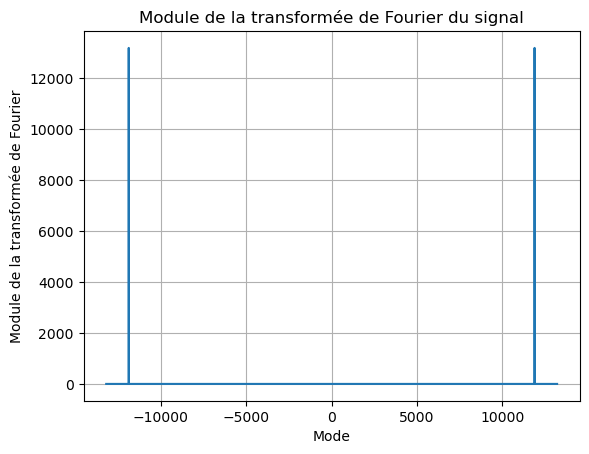

In [4]:
# Calcul de la transformée de Fourier du signal
fft_result = np.fft.fft(signal)

# Calcul des modes
N = len(fft_result)
modes = np.arange(-N//2, N//2)

# Représentation graphique
plt.plot(modes, np.abs(fft_result))
plt.xlabel('Mode')
plt.ylabel('Module de la transformée de Fourier')
plt.title('Module de la transformée de Fourier du signal')
plt.grid(True)
plt.show()

**b)** La fonction $\texttt{fftfreq(N, d)}$ de la bibliothèque $\texttt{numpy.fft}$ renvoie un tableau contenant les fréquences associées à la transformée de Fourier pour un signal contenant $N$ échantillons espacés d’un intervalle $d$
($d$ est donc l’inverse de la fréquence d’échantillonnage). Représenter les fréquences du signal sinusoidal en ordonnée en fonction du mode en abscisse. Faire de même pour les parties réelles et imaginaires. Que se passe-t-il si on change la valeur de $d$ ?

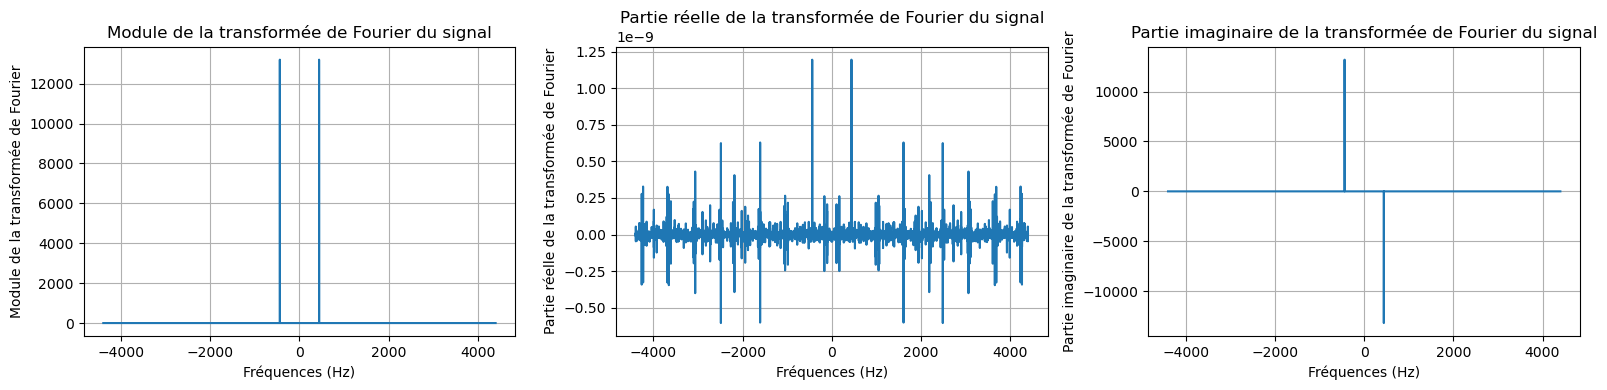

In [11]:
# Figure
plt.figure(figsize=(16, 4))


# Calcul des fréquences associées à la transformée de Fourier
N = len(signal)
d = 1 / sampling_rate
frequencies = np.fft.fftfreq(N, d)

# Représentation graphique des fréquences en fonction du mode
plt.subplot(1, 3, 1)
plt.plot(np.fft.fftshift(frequencies), np.abs(np.fft.fftshift(fft_result)))
plt.xlabel('Fréquences (Hz)')
plt.ylabel('Module de la transformée de Fourier')
plt.title('Module de la transformée de Fourier du signal')
plt.grid(True)


# Représentation graphique des parties réelles en fonction du mode
plt.subplot(1, 3, 2)
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(fft_result).real)
plt.xlabel('Fréquences (Hz)')
plt.ylabel('Partie réelle de la transformée de Fourier')
plt.title('Partie réelle de la transformée de Fourier du signal')
plt.grid(True)


# Représentation graphique des parties imaginaires en fonction du mode
plt.subplot(1, 3, 3)
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(fft_result).imag)
plt.xlabel('Fréquences (Hz)')
plt.ylabel('Partie imaginaire de la transformée de Fourier')
plt.title('Partie imaginaire de la transformée de Fourier du signal')
plt.grid(True)

plt.tight_layout()
plt.show()

**c)** La fonction $\texttt{fftshift}$ de $\texttt{numpy.fft}$ eﬀectue une permutation des éléments d’un tableau. Après l’avoir testée sur un tableau renvoyé par $\texttt{fftfreq}$, expliquer son intérêt pour la manipulation des coeﬃcients de la transformée de Fourier.

**3)** Représenter le module de la FFT du signal en ordonnée en fonction de la fréquence en abscisse.

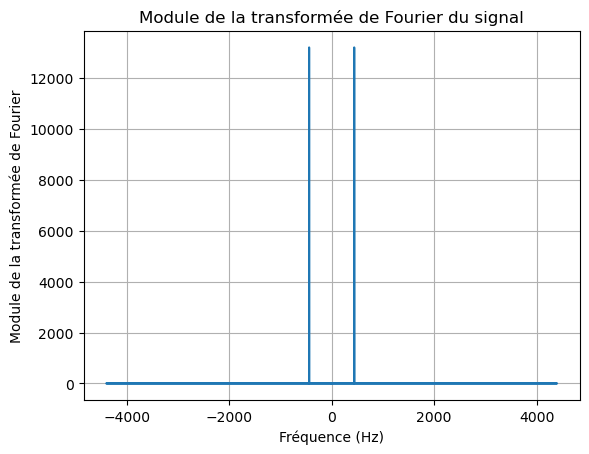

In [12]:
# Calcul des fréquences associées à la transformée de Fourier
N = len(signal)
d = 1 / sampling_rate
frequencies = np.fft.fftfreq(N, d)

# Calcul de la transformée de Fourier du signal
fft_result = np.fft.fft(signal)

# Représentation graphique
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Module de la transformée de Fourier')
plt.title('Module de la transformée de Fourier du signal')
plt.grid(True)
plt.show()

**4)** Même question en remplaçant le signal sinusoïdal par un signal carré (on pourra utiliser l'expression $\texttt{sign(sin x)}$, qui renvoie un signal carré de période $2\pi$, compris entre $-1$ et $1$).

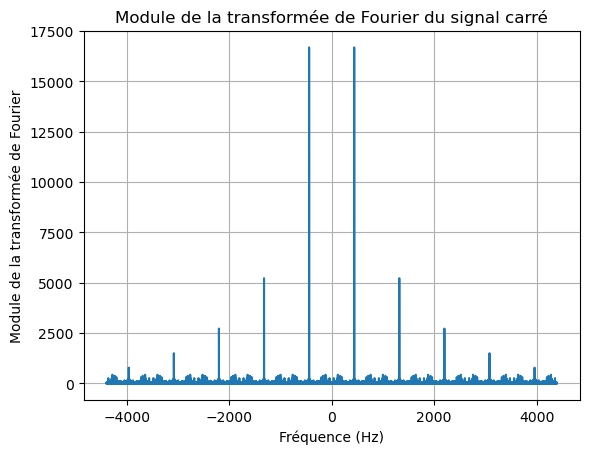

In [13]:
# Création du signal carré
time_square = np.linspace(0, duration, num_samples, endpoint=False)
signal_square = np.sign(np.sin(2 * np.pi * frequency * time_square))

# Calcul des fréquences associées à la transformée de Fourier
N_square = len(signal_square)
d_square = 1 / sampling_rate
frequencies_square = np.fft.fftfreq(N_square, d_square)

# Calcul de la transformée de Fourier du signal carré
fft_result_square = np.fft.fft(signal_square)

# Représentation graphique
plt.plot(frequencies_square, np.abs(fft_result_square))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Module de la transformée de Fourier')
plt.title('Module de la transformée de Fourier du signal carré')
plt.grid(True)
plt.show()

**5)** Même question en remplaçant le signal sinusoïdal par un signal triangulaire (on pourra utiliser l'expression $\frac{2}{\pi} \texttt{arcsin(sin x)}$, qui renvoie un signal triangulaire de période $2\pi$, compris entre $-1$ et $1$).

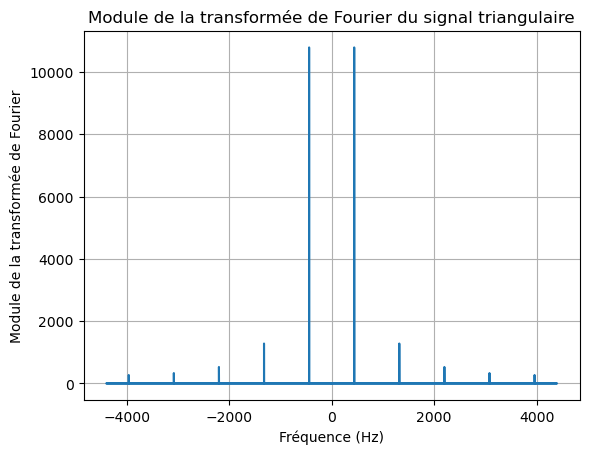

In [14]:
# Création du signal triangulaire
time_triangular = np.linspace(0, duration, num_samples, endpoint=False)
signal_triangular = (2 / np.pi) * np.arcsin(np.sin(2 * np.pi * frequency * time_triangular))

# Calcul des fréquences associées à la transformée de Fourier
N_triangular = len(signal_triangular)
d_triangular = 1 / sampling_rate
frequencies_triangular = np.fft.fftfreq(N_triangular, d_triangular)

# Calcul de la transformée de Fourier du signal triangulaire
fft_result_triangular = np.fft.fft(signal_triangular)

# Représentation graphique
plt.plot(frequencies_triangular, np.abs(fft_result_triangular))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Module de la transformée de Fourier')
plt.title('Module de la transformée de Fourier du signal triangulaire')
plt.grid(True)
plt.show()

**6)** Décrire les résultats obtenus.

**Exercice 2 - Visualisation de la transformée de Fourier discrète :**

**1)** En utilisant la commande $\texttt{subplot}$ de $\texttt{matplotlib.pyplot}$, écrire un programme permettant de visualiser dans $4$ fenêtres un signal $S$, la partie réelle de $\texttt{fft}(S)$, la partie imaginaire de $\texttt{fft}(S)$ et le module de $\texttt{fft}(S)$.

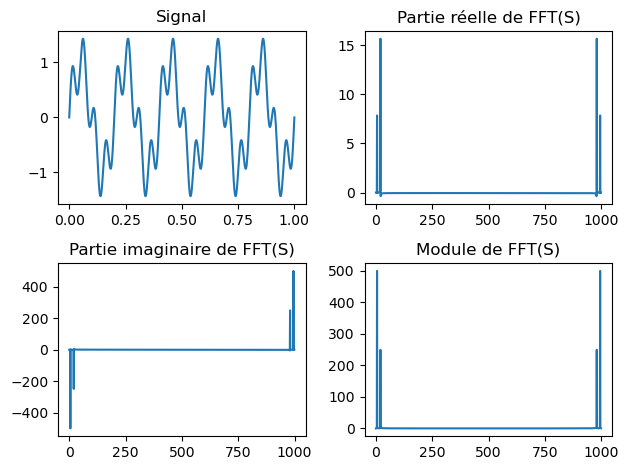

In [15]:
# Génération d'un signal
N = 1000
t = np.linspace(0, 1, N)
S = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# Calcul de la transformée de Fourier discrète du signal
fft_S = np.fft.fft(S)

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(2, 2)

# Affichage du signal
axs[0, 0].plot(t, S)
axs[0, 0].set_title('Signal')

# Affichage de la partie réelle de la transformée de Fourier
axs[0, 1].plot(np.real(fft_S))
axs[0, 1].set_title('Partie réelle de FFT(S)')

# Affichage de la partie imaginaire de la transformée de Fourier
axs[1, 0].plot(np.imag(fft_S))
axs[1, 0].set_title('Partie imaginaire de FFT(S)')

# Affichage du module de la transformée de Fourier
axs[1, 1].plot(np.abs(fft_S))
axs[1, 1].set_title('Module de FFT(S)')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

**2)** Visualiser à l’aide du programme précédent les *fft* des signaux d’une gaussienne, d’une fonction indicatrice d’un intervalle, d’un Dirac, d’un peigne de Diracs. Faire varier les paramètres de positions, de fréquence, de variance.

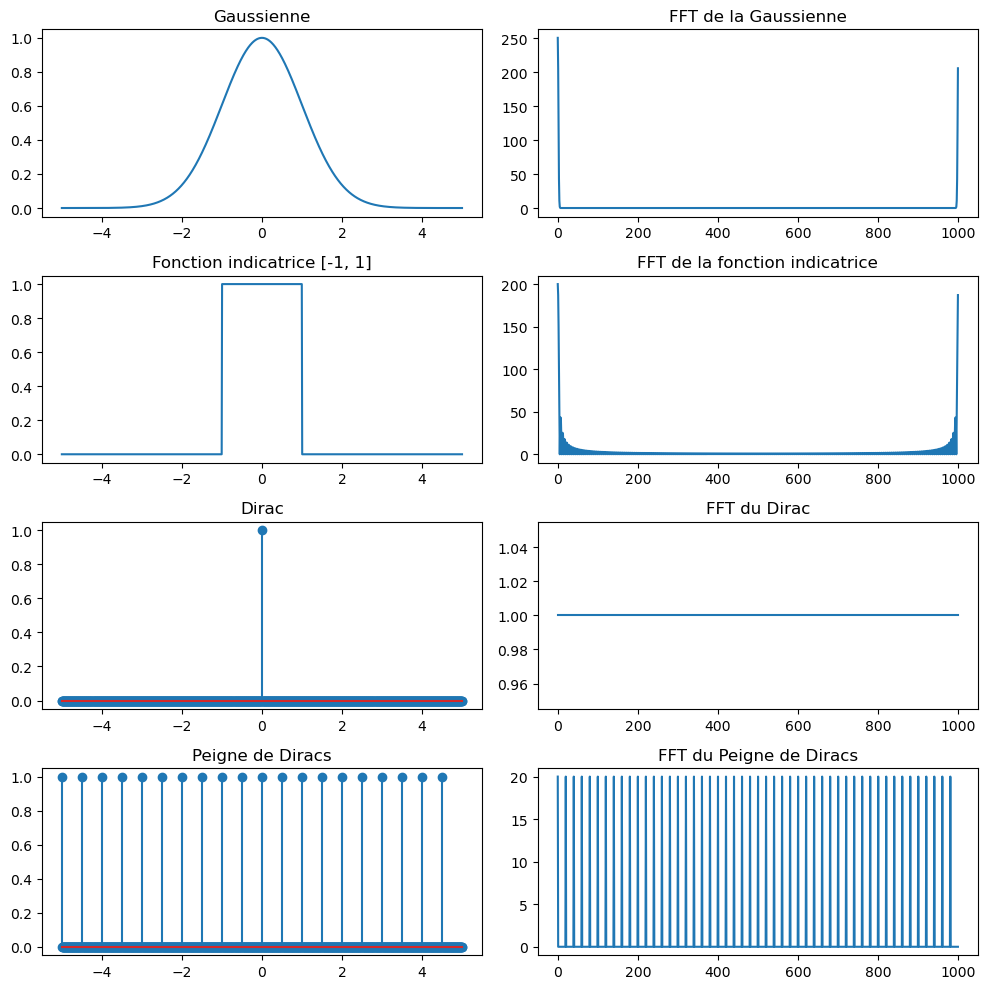

In [16]:
# Paramètres
N = 1000  # Nombre de points
t = np.linspace(-5, 5, N)  # Intervalle de temps

# Signal : Gaussienne
gaussian_signal = np.exp(-0.5 * t**2)

# Signal : Fonction indicatrice d'un intervalle [-1, 1]
indicator_signal = np.where(np.logical_and(t >= -1, t <= 1), 1, 0)

# Signal : Dirac
dirac_signal = np.zeros_like(t)
dirac_signal[N // 2] = 1  # Dirac centré

# Signal : Peigne de Diracs
peigne_signal = np.zeros_like(t)
peigne_signal[::50] = 1  # Peigne de Diracs espacés de 50 échantillons

# Calcul des transformées de Fourier discrètes
fft_gaussian = np.fft.fft(gaussian_signal)
fft_indicator = np.fft.fft(indicator_signal)
fft_dirac = np.fft.fft(dirac_signal)
fft_peigne = np.fft.fft(peigne_signal)

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Affichage des signaux
axs[0, 0].plot(t, gaussian_signal)
axs[0, 0].set_title('Gaussienne')
axs[1, 0].plot(t, indicator_signal)
axs[1, 0].set_title('Fonction indicatrice [-1, 1]')
axs[2, 0].stem(t, dirac_signal)
axs[2, 0].set_title('Dirac')
axs[3, 0].stem(t, peigne_signal)
axs[3, 0].set_title('Peigne de Diracs')

# Affichage des transformées de Fourier
axs[0, 1].plot(np.abs(fft_gaussian))
axs[0, 1].set_title('FFT de la Gaussienne')
axs[1, 1].plot(np.abs(fft_indicator))
axs[1, 1].set_title('FFT de la fonction indicatrice')
axs[2, 1].plot(np.abs(fft_dirac))
axs[2, 1].set_title('FFT du Dirac')
axs[3, 1].plot(np.abs(fft_peigne))
axs[3, 1].set_title('FFT du Peigne de Diracs')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

**3)** Tester d'autres signaux de base : piece-regular ou chirps.

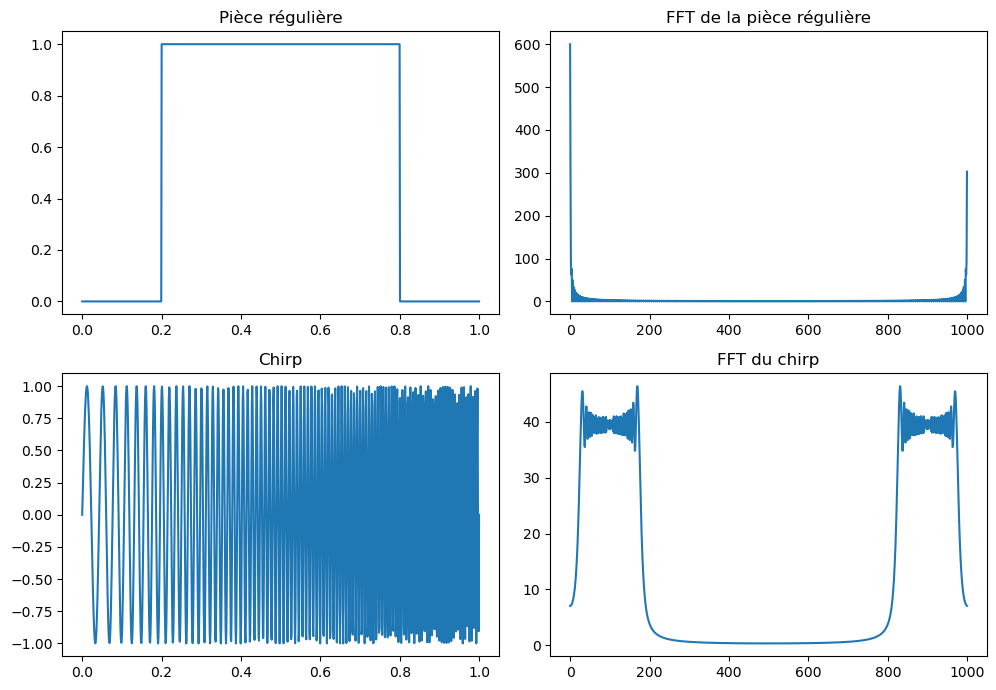

In [17]:
# Paramètres
N = 1000  # Nombre de points
t = np.linspace(0, 1, N)  # Intervalle de temps

# Signal : Pièce régulière
piece_signal = np.where(np.logical_and(t >= 0.2, t <= 0.8), 1, 0)

# Signal : Chirp
f0 = 20  # Fréquence initiale
f1 = 100  # Fréquence finale
chirp_signal = np.sin(2 * np.pi * (f0 + (f1 - f0) * t) * t)

# Calcul des transformées de Fourier discrètes
fft_piece = np.fft.fft(piece_signal)
fft_chirp = np.fft.fft(chirp_signal)

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Affichage des signaux
axs[0, 0].plot(t, piece_signal)
axs[0, 0].set_title('Pièce régulière')
axs[1, 0].plot(t, chirp_signal)
axs[1, 0].set_title('Chirp')

# Affichage des transformées de Fourier
axs[0, 1].plot(np.abs(fft_piece))
axs[0, 1].set_title('FFT de la pièce régulière')
axs[1, 1].plot(np.abs(fft_chirp))
axs[1, 1].set_title('FFT du chirp')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()